### 머신러닝에서 사용되는 전처리 기법

In [57]:
import sklearn
import numpy as np
import pandas

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [58]:
###데이터 준비하기
# - 어제 사용한 도미와 빙어 데이터 가지고 오기...
# - 2차원 데이터까지 만들어 주세요~

In [59]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [60]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [61]:
fish_data=[]

for i in range(len(length)):
    fish_data.append([length[i], weight[i]])
    
fish_data = [[leng,wei] for leng,wei in zip(length, weight)]

fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [62]:
fish_target = [1] *35 + [0] * 14

In [63]:

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [64]:
### numpy가 제공하는 함수를 이용한 2차원 데이터 생성하기
# 샘플
a = [1,2,3]
b = [4,5,6]
np.column_stack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [65]:
np.column_stack((length, weight))

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [66]:
###
print(np.ones(5))
print(np.zeros(5))

print(np.concatenate((np.ones(5),np.zeros(5))))  #np에러가 날때 소괄호를 하나 넣어보기


[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [67]:
### Numpy를 이용해서 1과 0의 임의 값 만들기
# - 튜플 형태로 만들어야 합니다.
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 훈련데이터세트와 테스트데이터세트 만들기
##### - 훈련데이터세트 : 독립변수의 훈련데이터와 target 데이터 생성
##### - 테스트데이터세트 : 독립변수의 테스트데이터와 target 데이터 생성

##### - train_data, train_target : 훈련에 사용
##### - test_data, test_target :평가 및 예측에 사용

In [68]:
### 어제 사용한 방식으로 훈련 및 테스트 데이터세트 생성해 주세요
# np.random.seed(42)
# index = np.arange(49)
# np.random.shuffle(index)
# ## 훈련데이터 생성하기
# train_input = input_arr[index[:35]]   #2차원
# train_target = target_arr[index[:35]] 

# test_input = input_arr[index[35:]]
# test_target = target_arr[index[35:]]

# kn= KNeighborsClassifier()
# kn.fit(train_input, train_target)
# kn.score(train_input, train_target)

In [69]:
### 사이킷런 패키지에는 훈련 및 테스트 데이터를 자동으로 섞어준느 함수가 있음
# -  train_test_splite()함수 : 섞어주기, 비율로 나누기

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
#훈련 및 테스트데이터 분류하여 가지고 오기,,,
# 총 4개의 변수값을 반환해 줍니다.

# test_size : 테스트데이터의 비율
# train_size : 훈련데이터의 비율
# 기본적으로 train : test = 75 : 25의 비율을 사용
# (대략 적인 비율)
# 일반적으로 훈련과 테스트비율은 7:3 또는 7.5 : 2.5를 사용..


train_input, test_input, train_target, test_target = \
    train_test_split(fish_data, fish_target,test_size = 0.25, random_state=42)

In [72]:
print(train_input)
print('---------------------------------------')
print(test_input)
print('---------------------------------------')
print(train_target)
print('---------------------------------------')
print(test_target)


[[30.0, 450.0], [29.0, 363.0], [29.7, 500.0], [11.3, 8.7], [11.8, 10.0], [13.0, 12.2], [32.0, 600.0], [30.7, 500.0], [33.0, 700.0], [35.0, 700.0], [41.0, 975.0], [38.5, 920.0], [25.4, 242.0], [12.0, 9.8], [39.5, 925.0], [29.7, 450.0], [37.0, 1000.0], [31.0, 500.0], [10.5, 7.5], [26.3, 290.0], [34.0, 685.0], [26.5, 340.0], [10.6, 7.0], [9.8, 6.7], [35.0, 680.0], [11.2, 9.8], [31.0, 475.0], [34.5, 620.0], [33.5, 610.0], [15.0, 19.9], [34.0, 575.0], [30.0, 390.0], [11.8, 9.9], [32.0, 600.0], [36.0, 850.0], [11.0, 9.7]]
---------------------------------------
[[32.0, 340.0], [12.4, 13.4], [14.3, 19.7], [12.2, 12.2], [33.0, 700.0], [36.0, 714.0], [35.0, 720.0], [35.0, 725.0], [38.5, 955.0], [33.5, 650.0], [31.5, 500.0], [29.0, 430.0], [41.0, 950.0]]
---------------------------------------
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
---------------------------------------
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [73]:
# 훈련데이터 차원 확인하기
print(train_input.shape, train_target.shape)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
### 샘플링 편향을 최소화 하기 위한 방법으로
# - stratify 속성을 사용..
# - 속성에는 기준값을 넣어줍니다. (보통 종속데이터)
# - 종속데이터의 분류 값을 기준으로  test_size의 비율로 섞어줍니다.

train_input, test_input, train_target, test_target = \
    train_test_split(fish_data, fish_target, stratify = fish_target,
                     test_size = 0.25, random_state=42)

In [ ]:
test_target


array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

### 특정 위치의 생선 예측하기
# - 특정 위치의 생선 : 예측 데이터 1개 사용

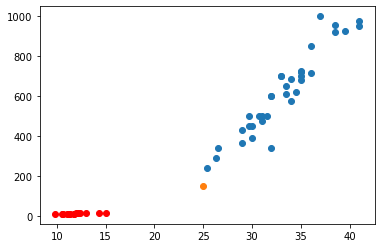

In [ ]:
### [문제]
# - 생선의 길이와 무게가 25cm, 150g
# - 이 생선은 도미? 빙어?
# 1. 훈련데이터를 산점도로 시각화하여 대략 위의 생선의 위치를 눈으로 확인
# 2. 모델 객체 생성 > 3.훈련데이터 학습> 4. 정확도 확인 > 5. 위의 생선 예측 6.산점도 그래프 시각화
# (훈련데이터에 대한 산점도와 위 생선 한개 위치 까지 포함해서)
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_length,c='red')
plt.scatter(25,150)
plt.show()

In [ ]:
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [ ]:
kn.score(test_input,test_target)

1.0

In [ ]:
kn.predict([[25,150]])

array([0.])

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150)
plt.scatter(train_input[indexs,0],train_input[indexes,1],marker='D')
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# 사용된 이웃값 확인하기
# - 모델 생성시 기본 5개의 이웃으로 지정되어 훈련이 됩니다.
# - 이웃 5개의 값을 추출하기 위해서는 kneighbors() 함수를 사용합니다.
# - kneighbors()함수의 반환값은 2개..
# - 첫번째 값은 : 특정 생선과 이웃과의 거리
# - 두번째 값은 : 이웃 5개의 실제 위치(인덱스 번호)


distances, indexes = kn.kneighbors([[25,150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150)
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [ ]:
### (해석)
# - x축의 범위와 y축의 범위가 너무 큰 차이로 나타난 현상
# - x축의 범위 : 10~40
# - y축의 범위 : 0~1000
# - 두 축의 범위 값이 너무 크게 차이가 나서 발생
# - y축으로 조금만 올라가도 거리는 크게 벌어집니다.
# - 도미들의 위치가 위로 조금만 올라가도 거리는 크게 벌어집니다.

# - 이런 현상을 '스케일이 다르다'라고 해석합니다.(x축과 y축의 단위가 틀려서)
# - 분석 시 매우 흔하게 발생하는 현상으로 전처리를 꼭 해주어야 합니다.
# - 전처리 방법 : x축과 y축의 값을 동일하게 맞춰주어야 합니다.

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150)
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

### x축의 범위를 y축과 동일하게 임의로 정해보겠습니다.
plt.xlim((0, 1000))

plt.show()

TypeError: list indices must be integers or slices, not tuple

## 스케일 동일하게 맞추기(전처리)
##### - 스케일을 맞추는 전처리 방법으로는 '표준점수(standard score)'를 사용
##### - 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차 만큼 떨어져 있는지를 나타내는 값
##### - 표준점수 계산공식
##### = (각 데이터-데이터세트 전체 평균값) / 데이터세트 전체 표준편차값
##### - 평균, 표준편차 계산은 넘파이(numpy)에서 제공하는 함수를 사용합니다.

In [ ]:
# 훈련데이터 전체 평균 구하기
mean = np.mean(train_input, axis = 0) #aixs=0 (행)
mean

array([ 27.29722222, 454.09722222])

In [ ]:
std =np.std(train_input, axis = 0)
std

array([  9.98244253, 323.29893931])

In [ ]:
#표준점수 데이터 계산하여 훈련데이터 재생성하기
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

### 스케일로 훈련데이터 재생성 후에는 훈련모델도 재생성

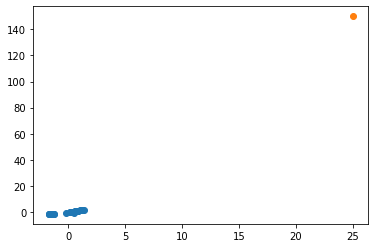

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150)
# plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

### x축의 범위를 y축과 동일하게 임의로 정해보겠습니다.

plt.show()

### (해석)
# - 훈련데이터는 스케일을 맞추었지만,
# - 예측데이터는 스케일을 맞추지 못해서 발생한 현상
# - 예측데이터 한개도 스케일 작업을 해줘야 합니다.
# -- 한개의 예측데이터 스케일 작업은
# -- 훈련데이터를 사용하여 계산된 평균과 표준편차 값을 사용해야 합니다.

In [ ]:
# 예측 데이터 스케일 작업하기
new = ([25,150]-mean) / std
new

array([-0.23012627, -0.94060693])

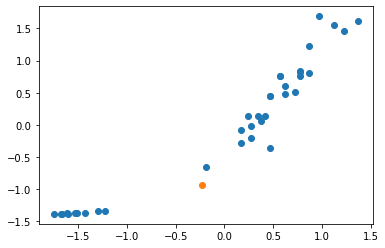

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1])
plt.show()

In [ ]:
kn=KNeighborsClassifier()
kn.fit(train_scaled,train_target)



KNeighborsClassifier()

In [ ]:
test_scaled = (test_input -mean) /std


In [ ]:
kn.score(train_scaled,train_target)

1.0

In [ ]:
kn.predict([new])

array([1.])

In [ ]:
distance, indexes = kn.kneighbors([new])
print(indexes)

[[21 14 34 32  5]]


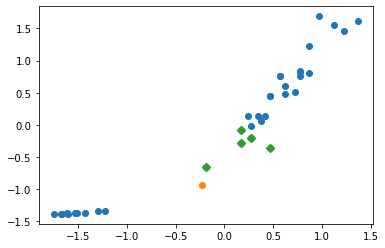

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1])
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')

### x축의 범위를 y축과 동일하게 임의로 정해보겠습니다.

plt.show()